<a href="https://colab.research.google.com/github/debajyotidutta2004/Tree_species/blob/main/Tree_species_classification_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from pathlib import Path

In [15]:
import os

repo_path = "/content/drive/MyDrive/Tree_Species_Dataset"
print("Contents:", os.listdir(repo_path))


Contents: ['simlo', 'saptaparni', 'pipal', 'shirish', 'sitafal', 'vad', 'other', 'sugarcane', 'sonmahor', 'pilikaren', 'kesudo', 'kanchan', 'jamun', 'khajur', 'neem', 'gunda', 'mango', 'gulmohor', 'motichanoti', 'nilgiri', 'banyan', 'coconut', 'bili', 'cactus', 'babul', 'champa', 'bamboo', 'asopalav', 'garmalo', 'amla', '.git']


In [16]:
class_dirs = os.listdir(repo_path)
print(f"Number of classes: {len(class_dirs)}")

Number of classes: 31


In [17]:

import glob

image_paths = []
labels = []

for class_name in os.listdir(repo_path):
    class_folder = os.path.join(repo_path, class_name)
    if os.path.isdir(class_folder):
        for img_file in os.listdir(class_folder):
            image_paths.append(os.path.join(class_folder, img_file))
            labels.append(class_name)

print(f"Total images: {len(image_paths)}")

Total images: 1605


In [18]:
import pandas as pd

class_counts = {cls: len(os.listdir(os.path.join(repo_path, cls))) for cls in class_dirs}
class_counts_df = pd.DataFrame.from_dict(class_counts, orient='index', columns=['Image Count'])
print(class_counts_df.sort_values('Image Count', ascending=False).head())
print("shape: ",class_counts_df.shape)

            Image Count
other               150
saptaparni           50
simlo                50
pipal                50
shirish              50
shape:  (31, 1)


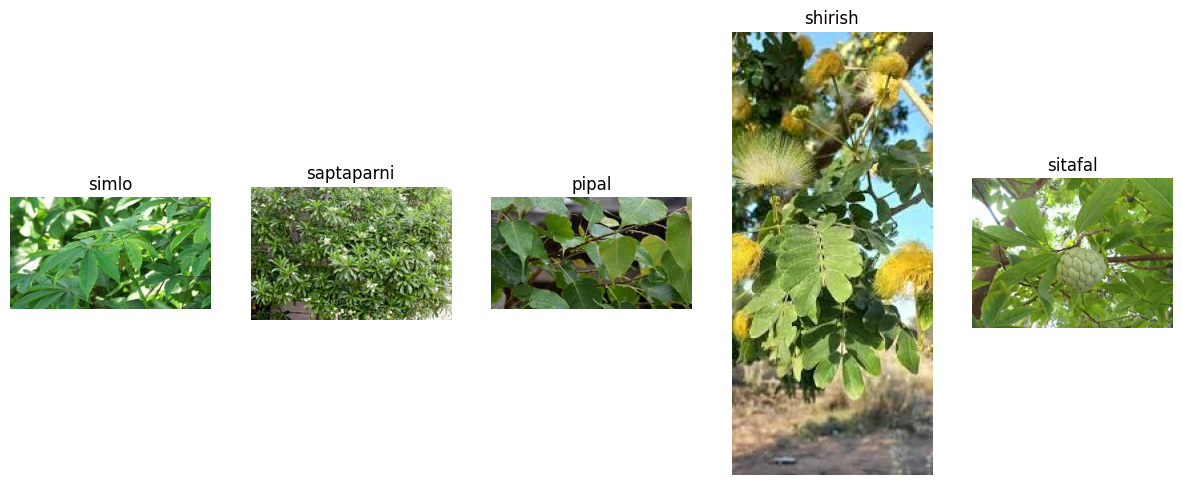

In [19]:
import matplotlib.pyplot as plt
from PIL import Image

def show_sample_images(repo_path, class_dirs, n=5):
    plt.figure(figsize=(15, 10))
    for i, class_dir in enumerate(class_dirs[:n]):
        img_path = os.path.join(repo_path, class_dir, os.listdir(os.path.join(repo_path, class_dir))[0])
        img = Image.open(img_path)
        plt.subplot(1, n, i+1)
        plt.imshow(img)
        plt.title(class_dir)
        plt.axis('off')
    plt.show()

show_sample_images(repo_path, class_dirs)

In [24]:
class_dirs = [d for d in os.listdir(repo_path) if os.path.isdir(os.path.join(repo_path, d))]



In [35]:
from PIL import Image
import os

image_shapes = []
valid_extensions = [".jpg", ".jpeg", ".png", ".bmp"]

# List only valid class directories
class_dirs = [d for d in os.listdir(repo_path) if os.path.isdir(os.path.join(repo_path, d))]

for class_dir in class_dirs:
    class_path = os.path.join(repo_path, class_dir)
    for img_file in os.listdir(class_path):
        # Check if the file is an image
        if any(img_file.lower().endswith(ext) for ext in valid_extensions):
            img_path = os.path.join(class_path, img_file)
            try:
                with Image.open(img_path) as img:
                    image_shapes.append(img.size)
            except Exception as e:
                print(f"Skipped: {img_path} — Reason: {e}")


In [36]:
import pandas as pd

shapes_df = pd.DataFrame(image_shapes, columns=["Width", "Height"])
shapes_df.head()


,Width,Height
0,300,168
1,208,243
2,194,259
3,275,183
4,239,211


In [37]:
import pandas as pd

shapes_df = pd.DataFrame(image_shapes, columns=["Width", "Height"])
shapes_df.head()


,Width,Height
0,300,168
1,208,243
2,194,259
3,275,183
4,239,211


In [38]:

print(shapes_df.describe())

             Width       Height
count  1600.000000  1600.000000
mean    312.623125   269.821875
std     296.220501   278.014229
min     141.000000   128.000000
25%     225.000000   183.000000
50%     259.000000   200.000000
75%     275.000000   259.000000
max    4000.000000  4032.000000


In [46]:
import hashlib
from collections import defaultdict
import os

hashes = defaultdict(list)

valid_extensions = [".jpg", ".jpeg", ".png", ".bmp"]

# Get only class folders
class_dirs = [d for d in os.listdir(repo_path) if os.path.isdir(os.path.join(repo_path, d))]

for class_dir in class_dirs:
    class_path = os.path.join(repo_path, class_dir)
    for img_file in os.listdir(class_path):
        img_path = os.path.join(class_path, img_file)

        # Skip if not a file or not an image
        if not os.path.isfile(img_path) or not any(img_file.lower().endswith(ext) for ext in valid_extensions):
            continue

        try:
            with open(img_path, 'rb') as f:
                file_hash = hashlib.md5(f.read()).hexdigest()
                hashes[file_hash].append(img_path)
        except Exception as e:
            print(f"Failed to read {img_path}: {e}")

# Filter duplicates
duplicates = {h: files for h, files in hashes.items() if len(files) > 1}
print("Duplicate image sets found:", len(duplicates))


Duplicate image sets found: 82


In [50]:
corrupt_images = []

for class_dir in class_dirs:
    for img_file in os.listdir(os.path.join(repo_path, class_dir)):
        img_path = os.path.join(repo_path, class_dir, img_file)
        try:
            img = Image.open(img_path)
            img.verify()
        except Exception as e:
            corrupt_images.append(img_path)

print("Corrupted images:", len(corrupt_images))

Corrupted images: 5


Duplicate set 1:


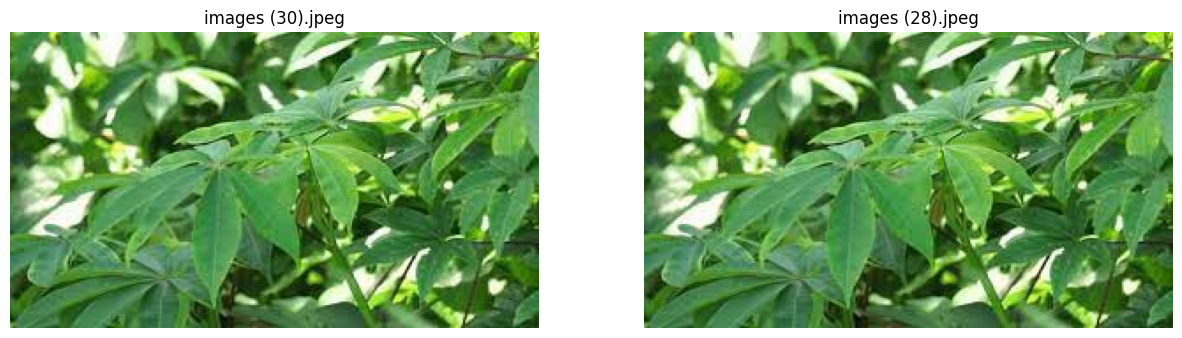

Duplicate set 2:


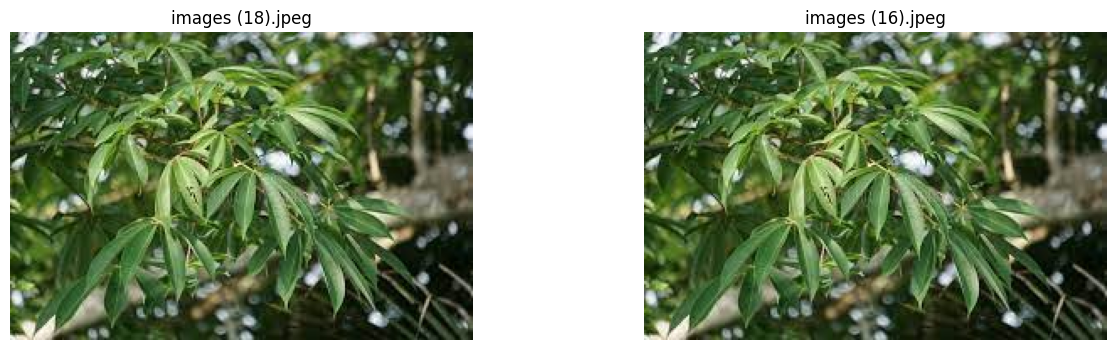

Duplicate set 3:


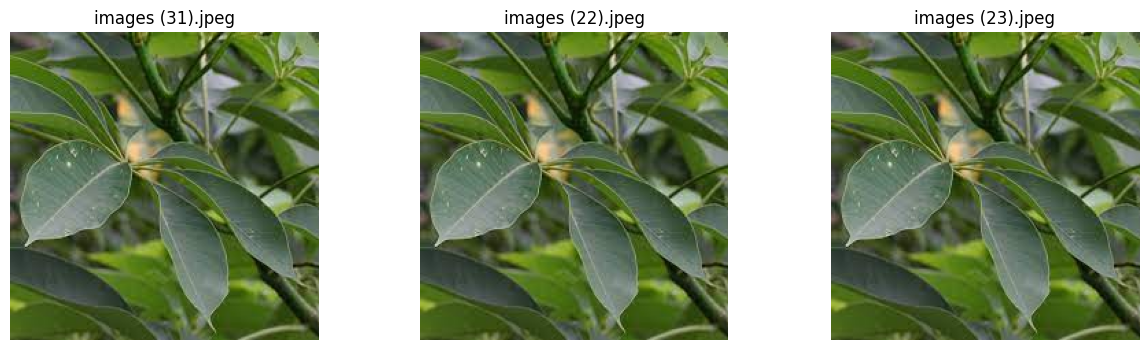

In [51]:

import matplotlib.pyplot as plt
from PIL import Image

def show_duplicate_sets(duplicates, sets_to_display=3):
    shown = 0
    for hash_val, dup_paths in duplicates.items():
        if shown >= sets_to_display:
            break
        print(f"Duplicate set {shown + 1}:")
        plt.figure(figsize=(15, 4))
        for i, img_path in enumerate(dup_paths):
            try:
                img = Image.open(img_path)
                plt.subplot(1, len(dup_paths), i+1)
                plt.imshow(img)
                plt.title(os.path.basename(img_path))
                plt.axis('off')
            except:
                continue
        plt.show()
        shown += 1

show_duplicate_sets(duplicates, sets_to_display=3)

In [56]:
import os

removed_count = 0

for dup_list in duplicates.values():
    # Keep the first, delete rest
    for img_path in dup_list[1:]:
        try:
            os.remove(img_path)
            removed_count += 1
        except Exception as e:
            print(f"Error deleting {img_path}: {e}")

print(f"✅ Removed {removed_count} duplicate images.")

Error deleting /content/drive/MyDrive/Tree_Species_Dataset/simlo/images (28).jpeg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Tree_Species_Dataset/simlo/images (28).jpeg'
Error deleting /content/drive/MyDrive/Tree_Species_Dataset/simlo/images (16).jpeg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Tree_Species_Dataset/simlo/images (16).jpeg'
Error deleting /content/drive/MyDrive/Tree_Species_Dataset/simlo/images (22).jpeg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Tree_Species_Dataset/simlo/images (22).jpeg'
Error deleting /content/drive/MyDrive/Tree_Species_Dataset/simlo/images (23).jpeg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Tree_Species_Dataset/simlo/images (23).jpeg'
Error deleting /content/drive/MyDrive/Tree_Species_Dataset/simlo/images (2).jpeg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Tree_Species_Dataset/simlo/images (2).jpeg'
Error deleting /content/drive/MyDrive/Tree_Species_Datase

In [58]:
import hashlib
from collections import defaultdict
import os

hashes = defaultdict(list)
valid_extensions = [".jpg", ".jpeg", ".png", ".bmp"]

# Reuse class_dirs if not already defined
class_dirs = [d for d in os.listdir(repo_path) if os.path.isdir(os.path.join(repo_path, d))]

for class_dir in class_dirs:
    class_path = os.path.join(repo_path, class_dir)
    for img_file in os.listdir(class_path):
        img_path = os.path.join(class_path, img_file)

        # ✅ Skip directories and non-image files
        if not os.path.isfile(img_path) or not any(img_file.lower().endswith(ext) for ext in valid_extensions):
            continue

        try:
            with open(img_path, 'rb') as f:
                file_hash = hashlib.md5(f.read()).hexdigest()
                hashes[file_hash].append(img_path)
        except Exception as e:
            print(f"Skipping {img_path}: {e}")

# Filter and print duplicates
duplicates = {h: files for h, files in hashes.items() if len(files) > 1}
print("🔁 Duplicates remaining:", len(duplicates))


🔁 Duplicates remaining: 0


In [59]:
from PIL import Image
import pandas as pd

# Gather image info
image_info = []

for class_dir in class_dirs:
    class_path = os.path.join(repo_path, class_dir)
    for img_file in os.listdir(class_path):
        img_path = os.path.join(class_path, img_file)
        try:
            with Image.open(img_path) as img:
                width, height = img.size
                image_info.append({
                    'path': img_path,
                    'width': width,
                    'height': height,
                    'class': class_dir
                })
        except:
            continue

df_sizes = pd.DataFrame(image_info)

# Define thresholds
small_imgs = df_sizes[(df_sizes['width'] < 150) | (df_sizes['height'] < 150)]
large_imgs = df_sizes[(df_sizes['width'] > 1000) | (df_sizes['height'] > 2000)]

print(f"🔻 Very small images: {len(small_imgs)}")
print(f"🔺 Very large images: {len(large_imgs)}")

🔻 Very small images: 20
🔺 Very large images: 40


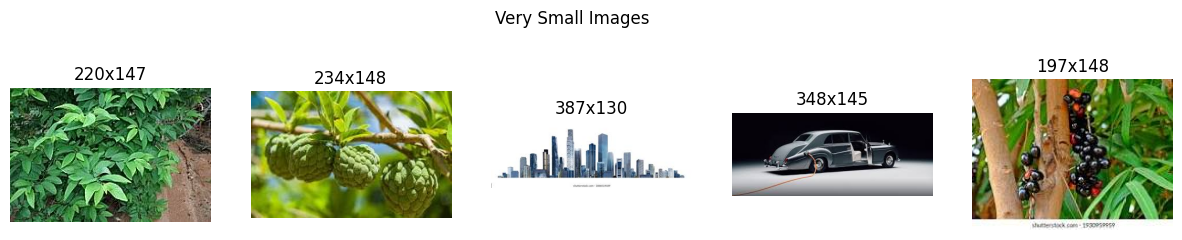

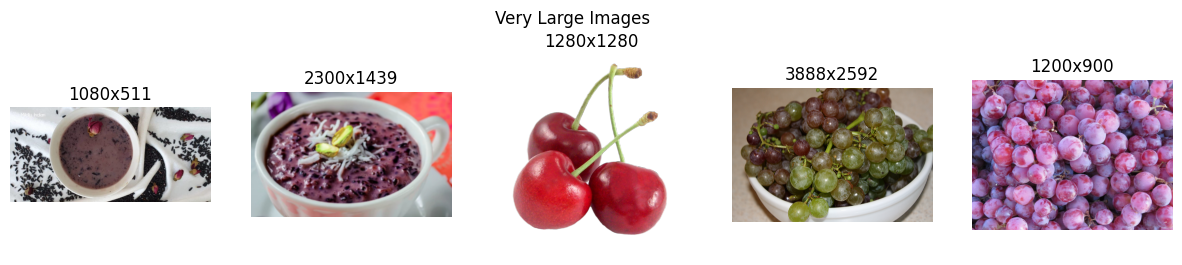

In [60]:
def show_images(df_subset, title, n=5):
    plt.figure(figsize=(15, 3))
    for i, (_, row) in enumerate(df_subset.head(n).iterrows()):
        img = Image.open(row['path'])
        plt.subplot(1, n, i+1)
        plt.imshow(img)
        plt.title(f"{row['width']}x{row['height']}")
        plt.axis('off')
    plt.suptitle(title)
    plt.show()

show_images(small_imgs, "Very Small Images")
show_images(large_imgs, "Very Large Images")

In [61]:
import os

# Combine both sets
outliers = pd.concat([small_imgs, large_imgs])

# Remove them
removed_count = 0
for path in outliers['path']:
    try:
        os.remove(path)
        removed_count += 1
    except Exception as e:
        print(f"Failed to remove {path}: {e}")

print(f"🗑️ Removed {removed_count} outlier images (small + large).")

🗑️ Removed 60 outlier images (small + large).


In [62]:
# Recalculate sizes
image_info = []

for class_dir in class_dirs:
    class_path = os.path.join(repo_path, class_dir)
    for img_file in os.listdir(class_path):
        img_path = os.path.join(class_path, img_file)
        try:
            with Image.open(img_path) as img:
                width, height = img.size
                image_info.append({
                    'path': img_path,
                    'width': width,
                    'height': height,
                    'class': class_dir
                })
        except:
            continue

df_sizes = pd.DataFrame(image_info)
print(df_sizes[['width', 'height']].describe())

             width       height
count  1454.000000  1454.000000
mean    275.872765   239.044704
std     117.507849   117.197342
min     150.000000   150.000000
25%     225.000000   183.000000
50%     259.000000   198.000000
75%     275.000000   256.000000
max    1000.000000  1247.000000


In [63]:

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define parameters
IMG_HEIGHT = 224
IMG_WIDTH = 224
BATCH_SIZE = 32

# Augmentation and rescaling
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    zoom_range=0.2,
    shear_range=0.2,
    horizontal_flip=True
)

train_gen = datagen.flow_from_directory(
    repo_path,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

val_gen = datagen.flow_from_directory(
    repo_path,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

Found 1177 images belonging to 31 classes.
Found 277 images belonging to 31 classes.


In [64]:
# Create a simple CNN model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dropout(0.3),
    Dense(train_gen.num_classes, activation='softmax')
])

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     9,437,696 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 31)             │        15,903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,694,431 (36.98 MB)

 Trainable params: 9,694,431 (36.98 MB)

 Non-trainable params: 0 (0.00 B)

In [65]:

EPOCHS = 10

history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=EPOCHS
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 138s 4s/step - accuracy: 0.0734 - loss: 3.4736 - val_accuracy: 0.0903 - val_loss: 3.2644
Epoch 2/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 128s 3s/step - accuracy: 0.1039 - loss: 3.2092 - val_accuracy: 0.1588 - val_loss: 3.0059
Epoch 3/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 137s 3s/step - accuracy: 0.1412 - loss: 3.0543 - val_accuracy: 0.1661 - val_loss: 2.9556
Epoch 4/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 136s 4s/step - accuracy: 0.1842 - loss: 2.8983 - val_accuracy: 0.2094 - val_loss: 2.7537
Epoch 5/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 130s 4s/step - accuracy: 0.2044 - loss: 2.7662 - val_accuracy: 0.2130 - val_loss: 2.7233
Epoch 6/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 121s 3s/step - accuracy: 0.2206 - loss: 2.7284 - val_accuracy: 0.2238 - val_loss: 2.7338
Epoch 7/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 117s 3s/step - accuracy: 0.2180 - loss: 2.7545 - val_accuracy: 0.2455 - val_loss: 2.6314
Epoch 8/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 119s 3s/step - accuracy: 0.2238 - loss: 2.6634 - val_accuracy: 0.1949 - v

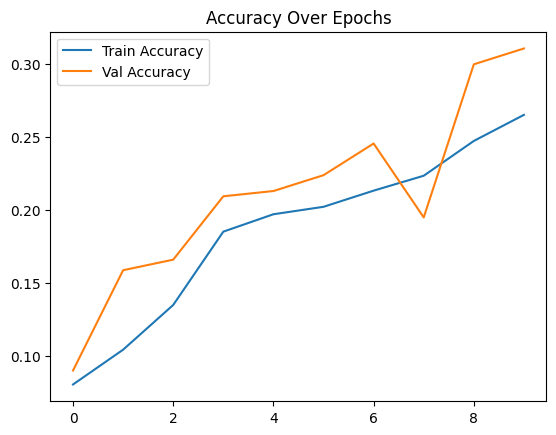

In [67]:

# Plot accuracy/loss curves
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title("Accuracy Over Epochs")
plt.show()

# Save model
model.save("tree_species_model.h5")

In [68]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define image properties
IMG_HEIGHT = 224
IMG_WIDTH = 224
BATCH_SIZE = 32

# Data generators
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

train_generator = datagen.flow_from_directory(
    repo_path,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)
val_generator = datagen.flow_from_directory(
    repo_path,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

# Number of output classes
num_classes = train_generator.num_classes

# Build a basic CNN model
model_cnn = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

model_cnn.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)
# Train the model
EPOCHS = 10
history_cnn = model_cnn.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=val_generator
)

# Save the model
model_cnn.save('basic_cnn_tree_species.h5')
print("✅ Basic CNN model saved as 'basic_cnn_tree_species.h5'")


Found 1177 images belonging to 31 classes.
Found 277 images belonging to 31 classes.
Epoch 1/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 116s 3s/step - accuracy: 0.0431 - loss: 4.4303 - val_accuracy: 0.1119 - val_loss: 3.2868
Epoch 2/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 112s 3s/step - accuracy: 0.1109 - loss: 3.2607 - val_accuracy: 0.1444 - val_loss: 3.1414
Epoch 3/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 110s 3s/step - accuracy: 0.1260 - loss: 3.1628 - val_accuracy: 0.1516 - val_loss: 3.1345
Epoch 4/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 115s 3s/step - accuracy: 0.1086 - loss: 3.1631 - val_accuracy: 0.1805 - val_loss: 2.8909
Epoch 5/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 114s 3s/step - accuracy: 0.1725 - loss: 2.9644 - val_accuracy: 0.1661 - val_loss: 2.8558
Epoch 6/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 140s 3s/step - accuracy: 0.1591 - loss: 2.9276 - val_accuracy: 0.1841 - val_loss: 2.7681
Epoch 7/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 111s 3s/step - accuracy: 0.2326 - loss: 2.7479 - val_accuracy: 0.2383 - val_loss: 2.7108
Epoch 8/10
37/37 ━━━━━━━━━

✅ Basic CNN model saved as 'basic_cnn_tree_species.h5'


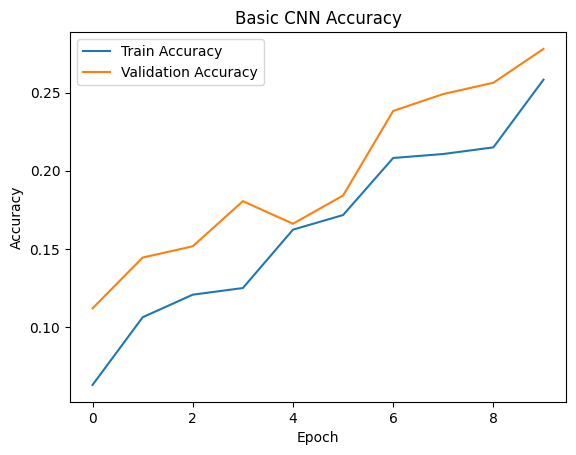

In [69]:

import matplotlib.pyplot as plt

plt.plot(history_cnn.history['accuracy'], label='Train Accuracy')
plt.plot(history_cnn.history['val_accuracy'], label='Validation Accuracy')
plt.title("Basic CNN Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [73]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(31, activation='softmax')  # Updated to match target shape
])

model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(train_generator, validation_data=val_generator, epochs=25)

model.save("improved_cnn_model.h5")


Epoch 1/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 178s 5s/step - accuracy: 0.0637 - loss: 5.3300 - val_accuracy: 0.0325 - val_loss: 8.0936
Epoch 2/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 165s 4s/step - accuracy: 0.1013 - loss: 3.2676 - val_accuracy: 0.0469 - val_loss: 13.4888
Epoch 3/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 162s 4s/step - accuracy: 0.1235 - loss: 3.2120 - val_accuracy: 0.0325 - val_loss: 17.7991
Epoch 4/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 162s 4s/step - accuracy: 0.1197 - loss: 3.1664 - val_accuracy: 0.0650 - val_loss: 17.4192
Epoch 5/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 171s 5s/step - accuracy: 0.1512 - loss: 3.1146 - val_accuracy: 0.0325 - val_loss: 20.1773
Epoch 6/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 164s 4s/step - accuracy: 0.1615 - loss: 3.0928 - val_accuracy: 0.0325 - val_loss: 18.7686
Epoch 7/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 161s 4s/step - accuracy: 0.1629 - loss: 3.0756 - val_accuracy: 0.0433 - val_loss: 19.2048
Epoch 8/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 172s 5s/step - accuracy: 0.1654 - loss: 3.0705 - val_accuracy: 0.04